# Deep learning for text

Natural Language Processing, the general name given to automated text processing, is next to computer vision the other  field where Deep Learning methods have brought a revolution. Deep Learning methods can be used for translation, content classification, sentiment analysis, text generation etc. with a quality that was never achieved before.

Similarly to images, text comes in a format that cannot be directly fed to simple networks has used in the introduction. We somehow need to find a way to transform text into numbers that make sense so that we can treat it as a regular numerical feature. Also similarly to images, text contains multi-scale information, i.e. the syntax is crucial to understand text. Similarly to last chapter, we will see how these problems can be solved through examples of architectures and will present some simple applications.

In [1]:
#to exexcute on Colab

#!pip install datasets
#!pip install transformers

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt

## Example dataset

In this chapter we will use as examples a dataset from the IMDB website aggregating reviews of movies. To access and process these data, we'll use several packages from the [HuggingFace](https://huggingface.co/) project, which offers both a platform for deep learning and dedicated packages. Here we load the dataset and create smaller more tractable datasets:

In [3]:
from datasets import load_dataset
imdb = load_dataset("imdb")

small_train_dataset = imdb["train"].shuffle(seed=42).select([i for i in list(range(6000))])
small_test_dataset = imdb["test"].shuffle(seed=42).select([i for i in list(range(300))])

Reusing dataset imdb (/Users/gw18g940/.cache/huggingface/datasets/imdb/plain_text/1.0.0/2fdd8b9bcadd6e7055e742a706876ba43f19faee861df134affd7a3f60fc38a1)


  0%|          | 0/3 [00:00<?, ?it/s]

Loading cached shuffled indices for dataset at /Users/gw18g940/.cache/huggingface/datasets/imdb/plain_text/1.0.0/2fdd8b9bcadd6e7055e742a706876ba43f19faee861df134affd7a3f60fc38a1/cache-8a9e43a6ac4acdff.arrow
Loading cached shuffled indices for dataset at /Users/gw18g940/.cache/huggingface/datasets/imdb/plain_text/1.0.0/2fdd8b9bcadd6e7055e742a706876ba43f19faee861df134affd7a3f60fc38a1/cache-2eff9f118d84c6fe.arrow


```small_train_dataset``` is an object that contains all the training review from the dataset. We can access access an example of the taining dataset like this:

In [4]:
small_train_dataset[1]

{'text': 'This movie is a great. The plot is very true to the book which is a classic written by Mark Twain. The movie starts of with a scene where Hank sings a song with a bunch of kids called "when you stub your toe on the moon" It reminds me of Sinatra\'s song High Hopes, it is fun and inspirational. The Music is great throughout and my favorite song is sung by the King, Hank (bing Crosby) and Sir "Saggy" Sagamore. OVerall a great family movie or even a great Date movie. This is a movie you can watch over and over again. The princess played by Rhonda Fleming is gorgeous. I love this movie!! If you liked Danny Kaye in the Court Jester then you will definitely like this movie.',
 'label': 1}

We see that we get both the review text and the label. Here ```1``` means positive review and ```0``` negative as can be seen here:

In [5]:
small_train_dataset[-2]

{'text': 'While not as bad as it has been made to be (I have seen MUCH worse), this is still a very lame movie. Basically a rehash of Siegel\'s "Coogan\'s Bluff", with the main difference being that Clint Eastwood\'s hat has more charisma than the whole of Joe Don Baker, an unappealing actor if there was one.<br /><br />However, Venantino Venantini is great (and great fun) as the bad guy, sort of a budget Vittorio Gassman. He is the main reason to sit through this steampile, as the rest of the cast deliver mostly terrible acting, specially the girl. Poor old Rossano Brazzi, hard to believe he was once a romantic lead (watch "Mondo Cane" to see him running away from women). Looking here like a second-tier Ben Gazzara, he\'s given next to nothing to do. It\'s all Joe Don\'s show, unfortunately. And all of it scored to generic 80\'s "action movie" music that couldn\'t be more boring.<br /><br />Greydon Clark can make good B-Movies ("Without Warning"), but here he trips, falls, breaks his 

## Tokenization

The review information we have above is pure text, so there is no way we can feed this information to a neural network. We'll have to turn these words into numbers. Before we can do this, there are multiple steps of pre-processing necessary. For example, we should take care of special signs like punctuation, emojis etc., be careful about handling words like U.K, find the whole vocabulary (without repeats of the same words) etc. This entire process is called **tokenization** and luckily there are packages that can perform this task for us. For example we can import a takonizer from the HuggingFace project:

In [6]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

Now we can apply it to any text. For example to the following sentence:

In [7]:
tokenizer('I am who I am')

{'input_ids': [101, 1045, 2572, 2040, 1045, 2572, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1]}

Focusing on the ```input_ids```, we see that each word has been assigned a number. And the same number is used for the same word, for example ```I``` is ```1045``` or ```am``` is ```2572```. The same can be done with our real inputs: 

In [8]:
import numpy as np

np.array(tokenizer(small_train_dataset[1]["text"])['input_ids'])

array([  101,  2023,  3185,  2003,  1037,  2307,  1012,  1996,  5436,
        2003,  2200,  2995,  2000,  1996,  2338,  2029,  2003,  1037,
        4438,  2517,  2011,  2928, 24421,  1012,  1996,  3185,  4627,
        1997,  2007,  1037,  3496,  2073,  9180, 10955,  1037,  2299,
        2007,  1037,  9129,  1997,  4268,  2170,  1000,  2043,  2017,
       24646,  2497,  2115, 11756,  2006,  1996,  4231,  1000,  2009,
       15537,  2033,  1997, 19643,  1005,  1055,  2299,  2152,  8069,
        1010,  2009,  2003,  4569,  1998, 28676,  1012,  1996,  2189,
        2003,  2307,  2802,  1998,  2026,  5440,  2299,  2003,  7042,
        2011,  1996,  2332,  1010,  9180,  1006, 17620, 14282,  1007,
        1998,  2909,  1000,  7842, 22772,  1000, 12312,  5974,  1012,
        3452,  1037,  2307,  2155,  3185,  2030,  2130,  1037,  2307,
        3058,  3185,  1012,  2023,  2003,  1037,  3185,  2017,  2064,
        3422,  2058,  1998,  2058,  2153,  1012,  1996,  4615,  2209,
        2011,  1054,

In [9]:
small_train_dataset[1]

{'text': 'This movie is a great. The plot is very true to the book which is a classic written by Mark Twain. The movie starts of with a scene where Hank sings a song with a bunch of kids called "when you stub your toe on the moon" It reminds me of Sinatra\'s song High Hopes, it is fun and inspirational. The Music is great throughout and my favorite song is sung by the King, Hank (bing Crosby) and Sir "Saggy" Sagamore. OVerall a great family movie or even a great Date movie. This is a movie you can watch over and over again. The princess played by Rhonda Fleming is gorgeous. I love this movie!! If you liked Danny Kaye in the Court Jester then you will definitely like this movie.',
 'label': 1}

If we compare the tokens with the actual input, we see for example that the verb ```is``` has now the value ```2003``` or the word ```this``` is now ```2023```. 

Now we can systematically tokenize our inputs using a small function:

In [10]:
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True)
 
tokenized_train = small_train_dataset.map(preprocess_function, batched=True)
tokenized_test = small_test_dataset.map(preprocess_function, batched=True)



Loading cached processed dataset at /Users/gw18g940/.cache/huggingface/datasets/imdb/plain_text/1.0.0/2fdd8b9bcadd6e7055e742a706876ba43f19faee861df134affd7a3f60fc38a1/cache-e2584d54a81628c9.arrow
Loading cached processed dataset at /Users/gw18g940/.cache/huggingface/datasets/imdb/plain_text/1.0.0/2fdd8b9bcadd6e7055e742a706876ba43f19faee861df134affd7a3f60fc38a1/cache-cec516bfe39a5fff.arrow


## One-hot encoding

So now we have a single number associated with each word, but these numbers are still not really usable for a deep learning network. Indeed the magnitude of an index doesn't mean anything, or having two words with successive indices doesn't indicate that they are related. When we deal with text, each word is actually a categorical variable. Just like an animal category could be ```cat```, ```dog```, ```bird``` etc. It's just that here the categories are **the entire vocabulary**. The common way to transform categorical variables to be usable in Machine Learning is to one-hot encode them. Let's look at a simplified example with our sentence ```This is a movie which is great.```. If these three words were out entire vocabulary, we could have the following encoding:

- This : 0
- is: 1
- a : 2
- movie: 3
- which: 4
- great: 5

For one-hot encoding, we now turn each word into a list of numbers (a vector) which has a the length of our vocabulary, in this case 6. These vectors are full of zeros, **except for the position corresponding to the word index**. So we would get:

- This: [1, 0, 0, 0, 0, 0]
- is: [0, 1, 0, 0, 0, 0]
- a: [0, 0, 1, 0, 0, 0]
- movie: [0, 0, 0, 1, 0, 0]
- which: [0, 0, 0, 0, 1, 0]
- great: [0, 0, 0, 0, 0, 1]

Now these vectors can in principle be fed to a neural network!

## Problem with one-hot encoding

The problem with this approach is that usually our vocabulary is not just composed of three words but thousands or hundreds of thousands. So instead of having vectors of length 6, we would have vectors of length thousands or hundreds of thousands. Such vectors are mostly filled with zeros, so when we feed them to a network, most of the computation just ends up being multiplications by zeros which is very inefficient and useless. So we need now to come up with a way to "compress" the information by summarizing it.

## Embeddings

The solution to this problem is to create an **embedding**. Instead of having for each word a very long (and empty) vector like:
```
[0, 0, 1, 0, 0, 0]
```

we replace it with a much shorter vector for example of dimensions 3 which contains mostly non-zero values this time like:
```
[0.5, 0.1, 0.8]
```

So to come back to our initial example, we could now have the following encoding:

- This: [0.3, 0.2, 0.7]
- is: [0.9, 0.0, 0.2]
- a: [0.5, 0.1, 0.8]
- movie: [0.3, 0.8, 0.2]
- which: [0.8, 0.5, 0.3]
- great: [0.1, 0.1, 0.9]

Now each word in our vocabulary has a vector. So if a word is assigned a numbers, as done by tokenization, we can just use that number to look up the embedding vector as described in the figure below. When we have a sentence, we do the same for each word and end-up with a matrix that represents the sentence: 

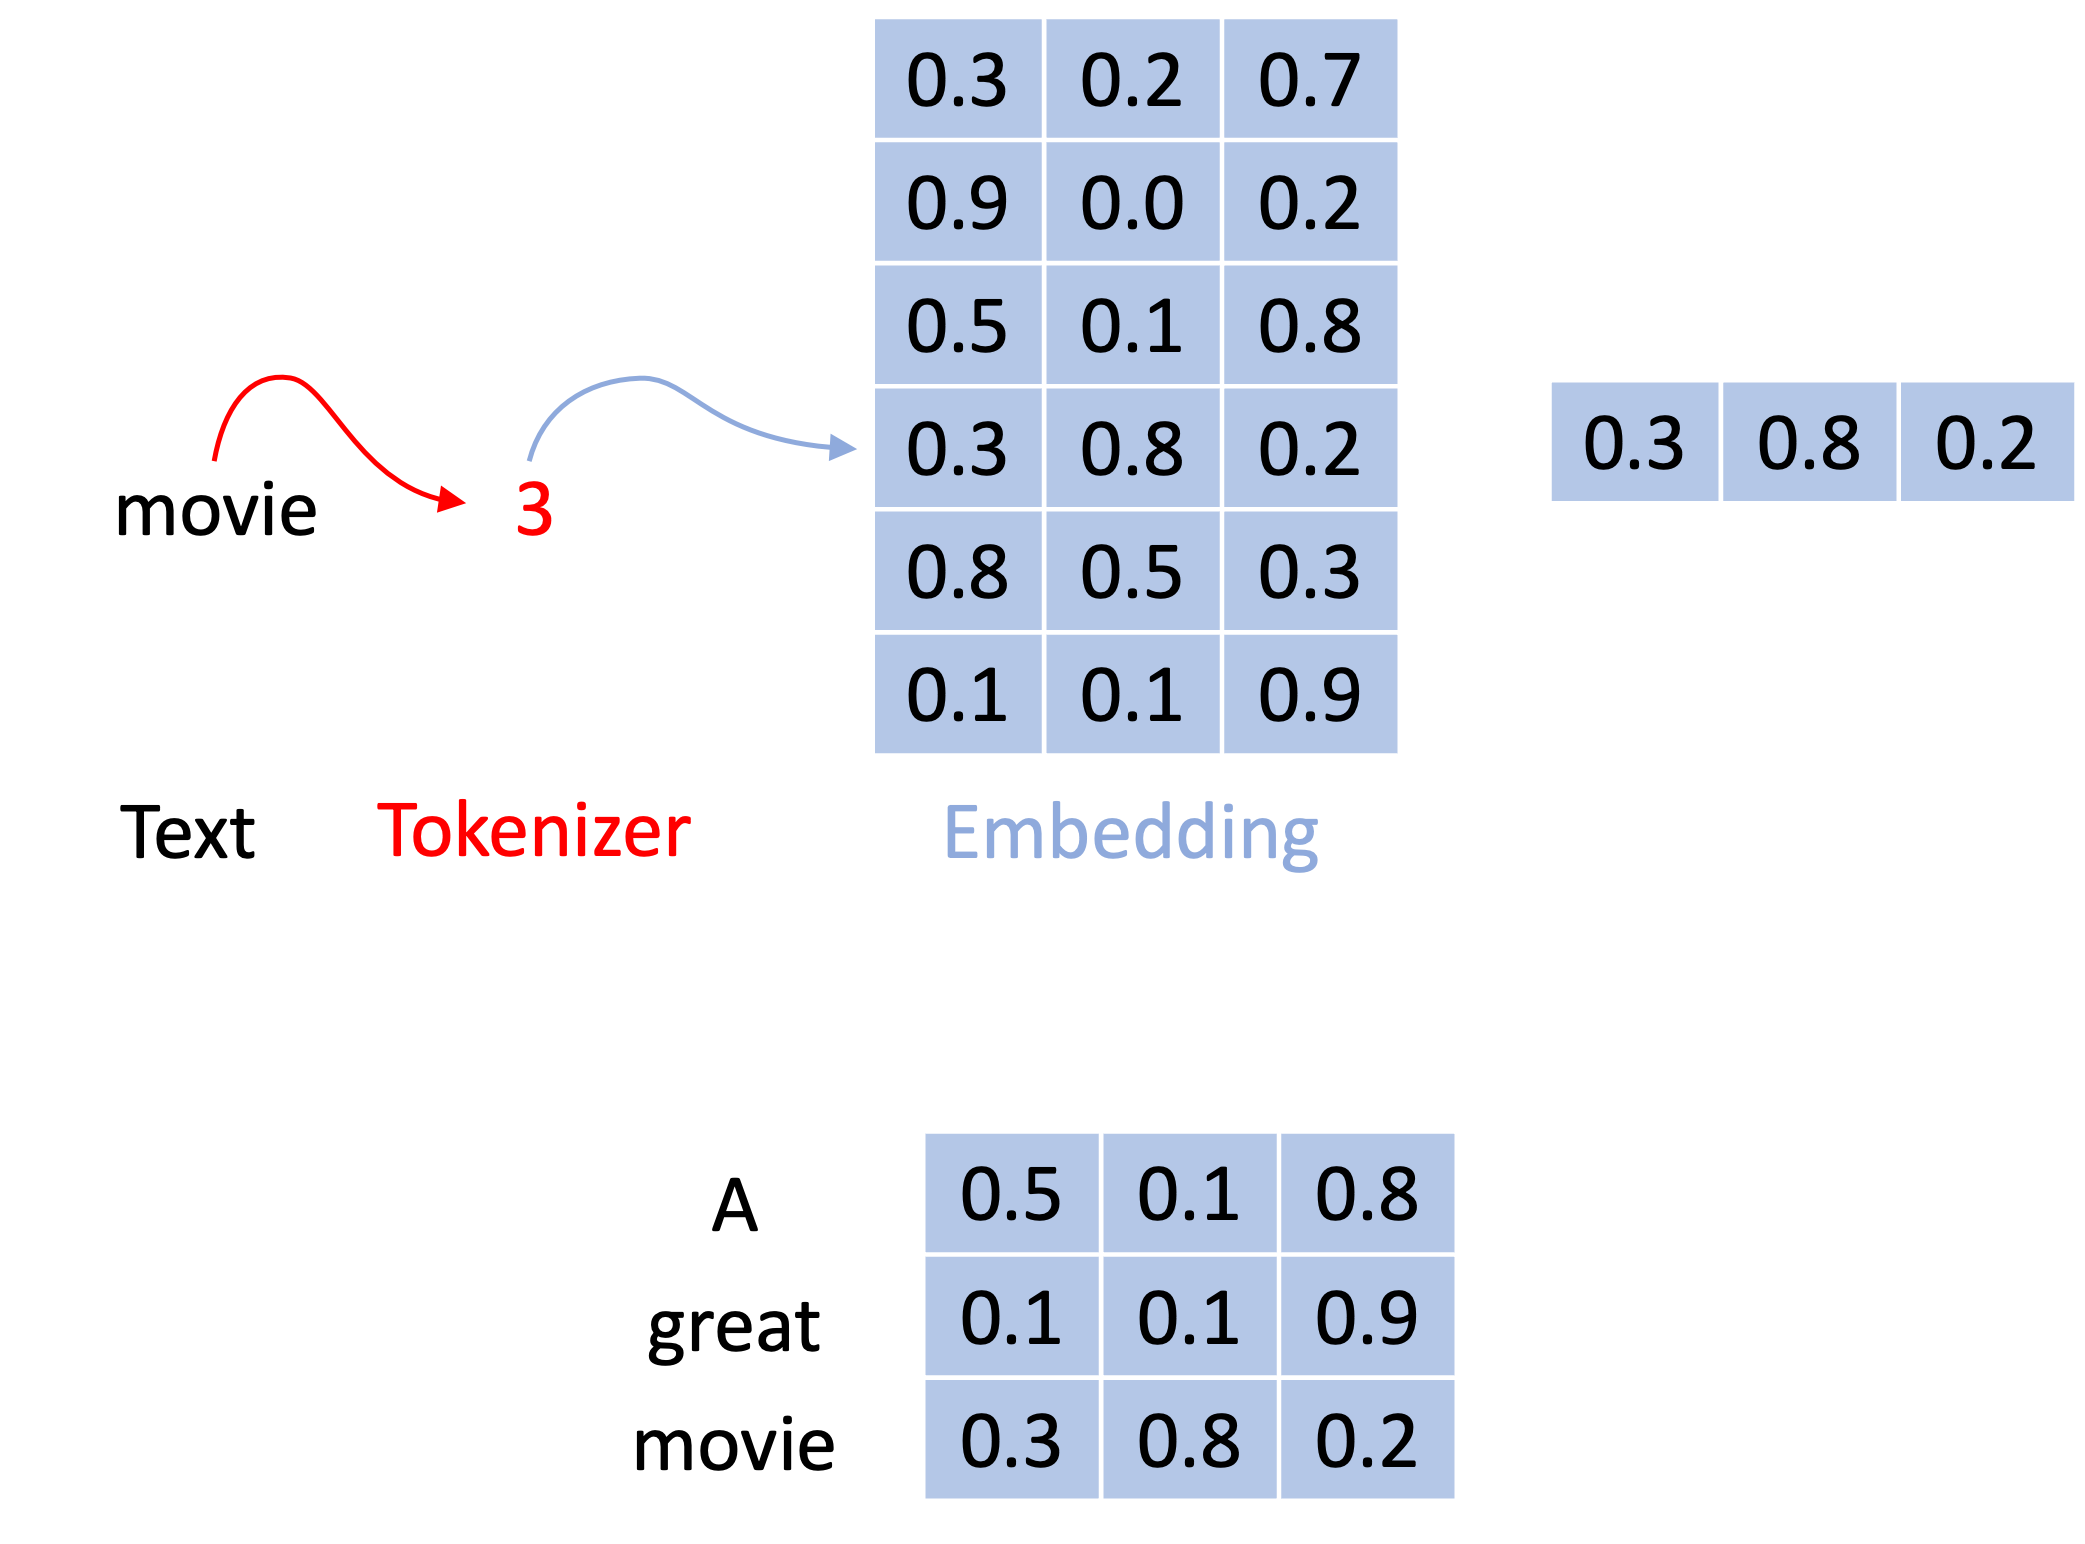

In [34]:
from IPython.display import Image, display
Image('images/embedding.png', width=500)

The encoding is not random. The number in the embedding layer can just be treated as regular weights in a network and trained with the rest of an architecture. Alternatively, the embedding can be more *meaningful* when it is trained following specific method like Word2Vec. In this case, one tries to create vectors that are related to the meaning of the words themselves. The general idea is to use the context of a given word, the words surrounding it to train an embedding layer. During training of the embedder, the goal is for example to predict the next word based on the current word. Once trained the vectors are meaningful, i.e. similar words would point in the same direction and words can even be composed together. In a simplified example, we could imagine that our embedding space has just two dimensions, and we can construct logical reasoning as depicted below:

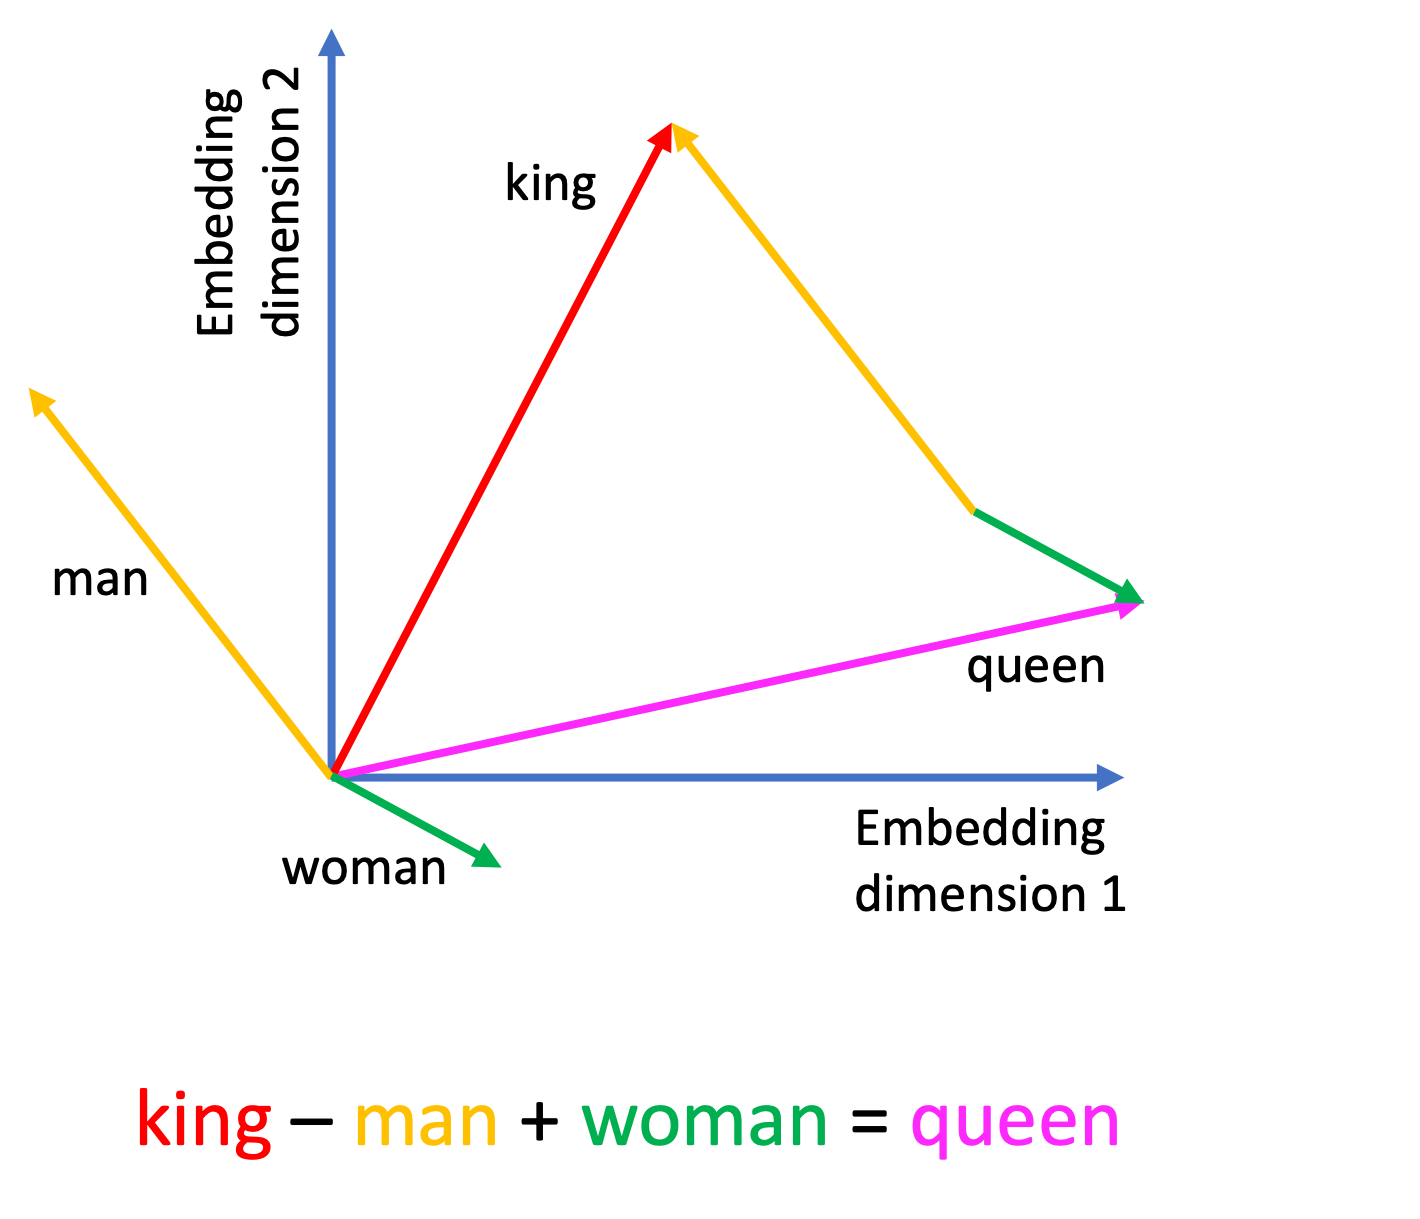

In [11]:
Image('images/embedding_word2vec.png', width=500)

## Network

Now that we have our input formatted correctly, we can create a simple network. Let's first create the embedding layer. In order to define it, we need to know the size of the vocabulary and the size of the vectors (how many dimensions each vector has). As we used a pre-made tokenizer, we need to take the vocabulary size from it:

In [11]:
tokenizer.vocab_size

30522

For the embedding dimension, we can pick a value. This will depend on the task, the size of the dataset etc. Here we'll just pick 16. Now we define the layer: 

In [12]:
from torch import nn

embed_size = 16
embedding_layer = nn.Embedding(num_embeddings=tokenizer.vocab_size, embedding_dim=embed_size)

We can try to pass a sentence through it. We first tokenize it:

In [14]:
sentence = 'This is a good movie.'
sentence_tokenized = tokenizer(sentence)['input_ids']
sentence_tokenized

[101, 2023, 2003, 1037, 2204, 3185, 1012, 102]

As for images, we then have to turn these numbers into tensors:

In [15]:
text_tensor = torch.tensor(sentence_tokenized,  dtype=torch.int)
text_tensor

tensor([ 101, 2023, 2003, 1037, 2204, 3185, 1012,  102], dtype=torch.int32)

Now we can finally embed the sentence (we also add a dimension for batches):

In [16]:
out_embed = embedding_layer(text_tensor.unsqueeze(0))

In [17]:
out_embed.shape

torch.Size([1, 8, 16])

This is the output: a list of vectors, one for each word (6 + beginning and end markers), of dimension 16!

Now we can pass this embedding to the next layer. To simplify things, we just average all vectors using an average pooling:

In [18]:
avg_pool = nn.AdaptiveAvgPool2d(output_size=[1, embed_size])

In [19]:
out_pool = avg_pool(out_embed)
out_pool

tensor([[[-0.1188,  0.5324,  0.1324, -0.4927,  0.3007, -0.2889, -0.1892,
           0.0997, -0.3484,  0.4692, -0.0432,  0.5211,  0.2423, -0.0848,
           0.4045, -0.2822]]], grad_fn=<AdaptiveAvgPool2DBackward0>)

So we just have a "summary vector" of our sentence, a bit in the same way as we reduced the image size in the previous chapter. Now we can just add a linear layer for classification, plus an activation and output a single value. That single value will indicate the category:

In [20]:
lin_layer1 = nn.Linear(in_features=embed_size, out_features=16)
lin_layer2 = nn.Linear(in_features=16, out_features=2)
relu_layer = nn.ReLU()

In [21]:
out_lin1 = lin_layer1(out_pool)
out_lin1_activated = relu_layer(out_lin1)
out_lin1_activated

tensor([[[0.0000, 0.1675, 0.0000, 0.0000, 0.0000, 0.0000, 0.5466, 0.0000,
          0.0000, 0.1447, 0.0745, 0.0000, 0.0000, 0.0846, 0.3898, 0.1736]]],
       grad_fn=<ReluBackward0>)

In [22]:
out = lin_layer2(out_lin1_activated)
out

tensor([[[-0.1328, -0.1288]]], grad_fn=<AddBackward0>)

And now we can put together all parts as a sequential object:

In [23]:
model = nn.Sequential(
    embedding_layer,
    avg_pool,
    lin_layer1,
    relu_layer,
    lin_layer2,
    nn.Flatten()
)

In [24]:
model(text_tensor.unsqueeze(0))

tensor([[-0.1328, -0.1288]], grad_fn=<ReshapeAliasBackward0>)

## Training

Finally we can train the network. We proceed exactly as before, taking batches of 10 reviews and running over all examples multiple times.

To simplify things we just take care of keeping only reviews that are 100 words long as this the length that we give to the network:

In [25]:
keep = np.array([ind for ind, x in enumerate(tokenized_train) if len(x['input_ids']) > 100])
keep_test = np.array([ind for ind, x in enumerate(tokenized_test) if len(x['input_ids']) > 100])

In [26]:
tokenized_train = tokenized_train.select(keep)
tokenized_test = tokenized_test.select(keep_test)

In [27]:
inputs_test = tokenized_test['input_ids']
inputs_test = torch.tensor([b[0:np.min([len(b), 100])] for b in inputs_test],  dtype=torch.int)
targets_test = tokenized_test['label']
targets_test = torch.tensor(targets_test, dtype=torch.int64)

In [28]:
from torch import optim

optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

accuracy_test = []
for j in range(10):
    
    if j%10 == 0:
            print(f'epoch: {j}')
            
    for i in range(500):
            
        # get the inputs; data is a list of [inputs, labels]
        inputs = tokenized_train[i*10:(i+1)*10]['input_ids']
        inputs = torch.tensor([b[0:np.min([len(b), 100])] for b in inputs],  dtype=torch.int)
        
        targets = tokenized_train[i*10:(i+1)*10]['label']
        targets = torch.tensor(targets, dtype=torch.int64)
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        accuracy_test.append(torch.sum(torch.abs(model(inputs_test).argmax(axis=1)-targets_test)) / len(targets_test))

epoch: 0


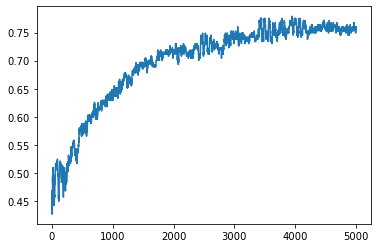

In [29]:
import matplotlib.pyplot as plt
plt.plot(1-np.array(accuracy_test));

Even with such a simple model, we reach an accuracy of 80%. We cant test it with our own reviews now:

In [30]:
sentence = 'I really enjoyed this good movie.'
sentence_tokenized = tokenizer(sentence)['input_ids']
text_tensor = torch.tensor(sentence_tokenized,  dtype=torch.int)

In [31]:
model(text_tensor.unsqueeze(0)).argmax()

tensor(1)

In [32]:
sentence = 'This was a terrible movie.'
sentence_tokenized = tokenizer(sentence)['input_ids']
text_tensor = torch.tensor(sentence_tokenized,  dtype=torch.int)
model(text_tensor.unsqueeze(0)).argmax()

tensor(0)

## Context

The problem with the sort of simple network described above is the loss of context. Similarly to images where we had to use convolutions to capture local context, we need here as well to consider the fact that sentences have a syntax where distance words have influence on each other. One solution to this is to use layers that include the concept of memory. The simplest example are recurrent networks. While in a classic layer all input (e.g. from a sequence) pass through a network together, in a recurrent network, elements pass sequentially, and the output of each step is re-used with the next element as depicted below:

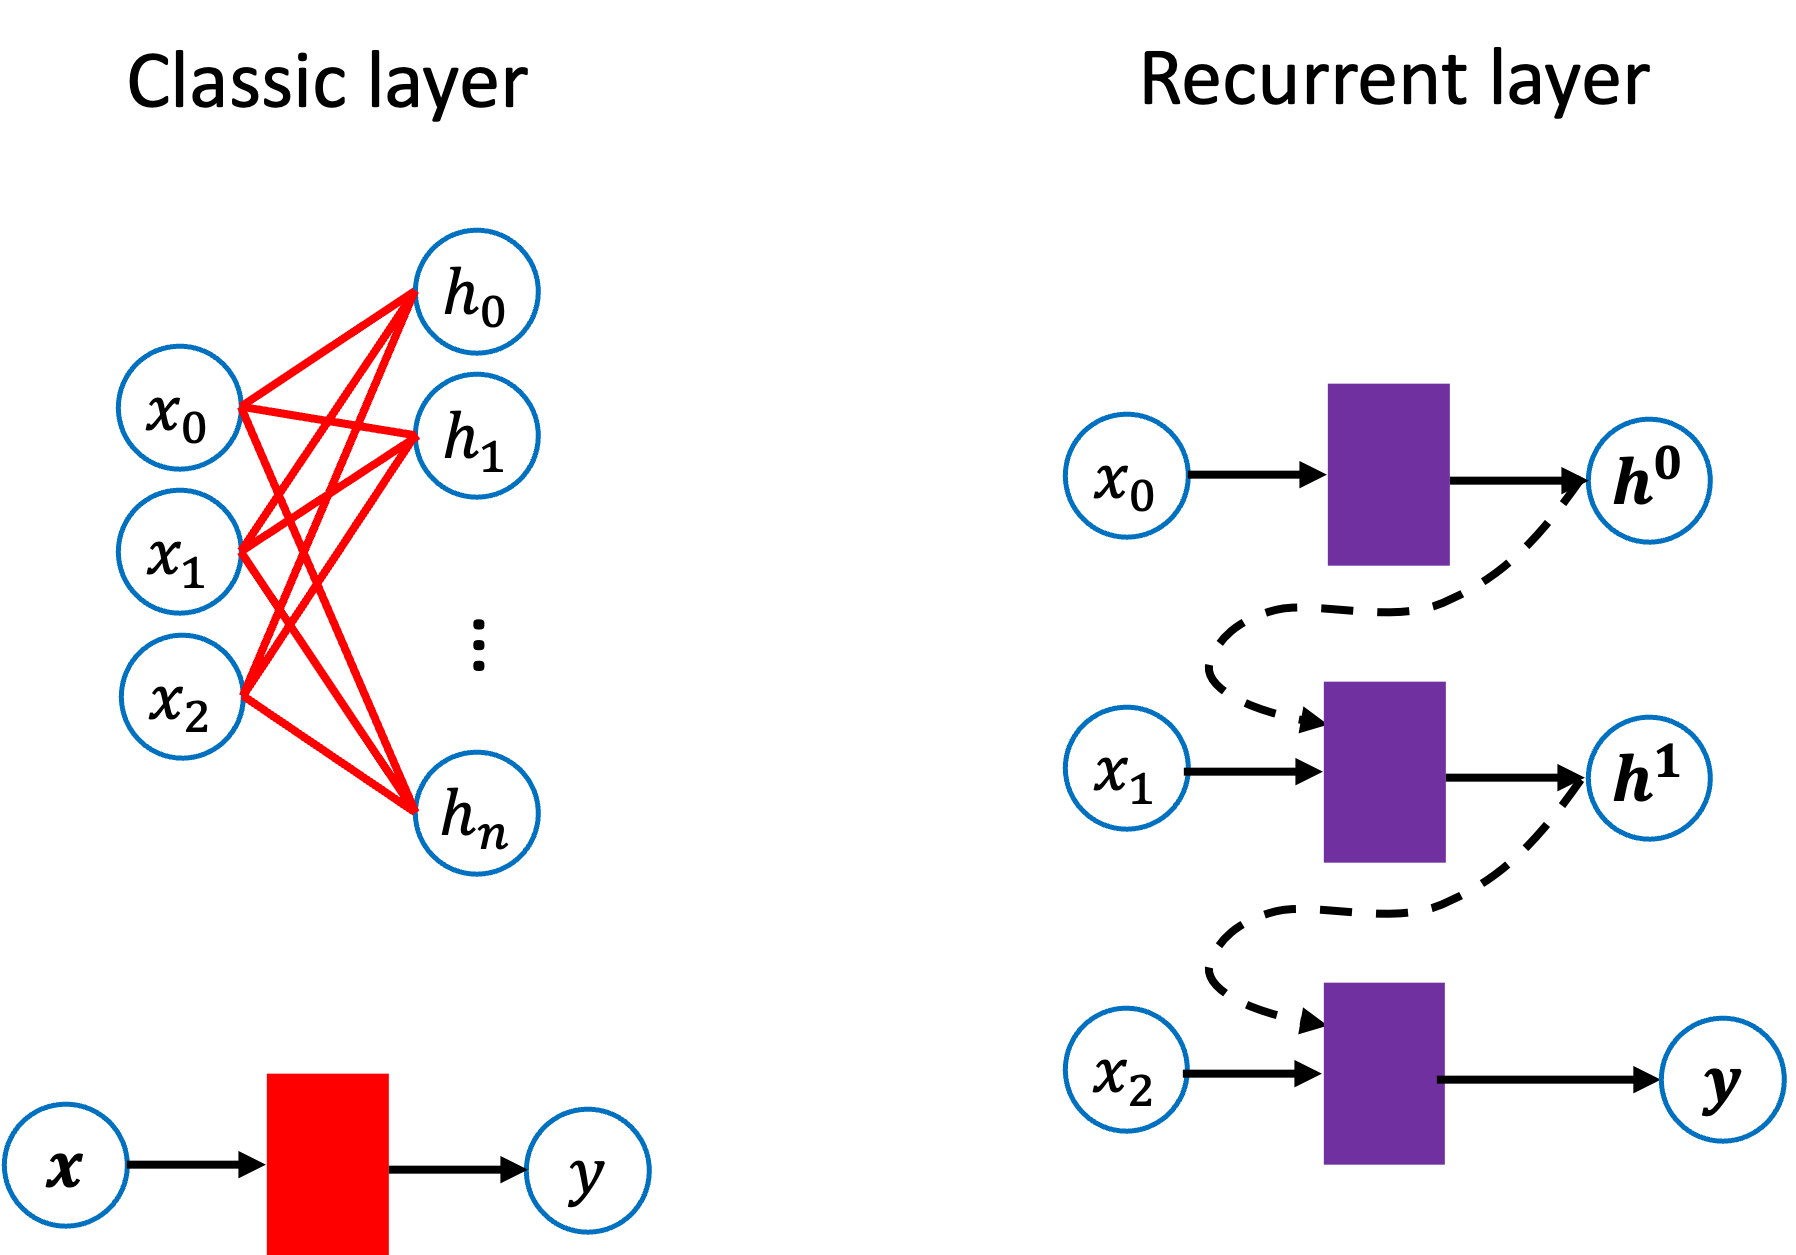

In [35]:
Image('images/rnn.png', width=500)

In our case of NLP, each $x_i$ is a word. Inside each violet box above, both the new word $x_1$, $x_2$ etc. and the previous output $h^0$, $h^1$ etc., containing info about previous words, pass through a linear layer and are combined together. This combination of old and new information allows to take into account the context ($h^i$) of each word.

There are many types of recurrent layers, one of the most popular being the Long-term Short-Term Memory layer, which allows better preservation of long-time memory.

## Using trained networks

We have seen in details above how text can be transformed to be fed to a network and examples of networks that can be designed. Most of the time however, one doesn't recreate from scratch such networks but uses existing ones. Using libraries such as those from [HuggingFace](https://huggingface.co/), getting access to these advanced tools is relatively easy:

In [36]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Here we created a pipeline designed for sentiment analysis and use a default trained model. We can now write any sentence and the model will tell us if it is a positive or negative one:

In [37]:
data = ["I love you", "I hate you", "You are banana"]
sentiment_pipeline(data)

[{'label': 'POSITIVE', 'score': 0.9998656511306763},
 {'label': 'NEGATIVE', 'score': 0.9991129040718079},
 {'label': 'POSITIVE', 'score': 0.6178045868873596}]

We can see that the scores above reflect how sure the model is about its answer. For obvious cases like "I love you" the score is high, but for a non-sense sentence like "You are banana" it is much lower.

You can find many more models, also trained on other tasks, on the HuggingFace website. To use one, you can just specify its name in the ```model``` option. For example this model has been trained on tweeets of US senators to predict their party:

In [38]:
politics_pipeline = pipeline("sentiment-analysis", model='m-newhauser/distilbert-political-tweets')

In [39]:
data = ['I am opposed to gay marriage', 'I support gay mariage']

In [40]:
politics_pipeline(data)

[{'label': 'Republican', 'score': 0.8125801086425781},
 {'label': 'Democrat', 'score': 0.9999924898147583}]

Or here we have an example of a summarizer (from https://huggingface.co/facebook/bart-large-cnn):

In [60]:
from transformers import pipeline

summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

ARTICLE = """ New York (CNN)When Liana Barrientos was 23 years old, she got married in Westchester County, New York.
A year later, she got married again in Westchester County, but to a different man and without divorcing her first husband.
Only 18 days after that marriage, she got hitched yet again. Then, Barrientos declared "I do" five more times, sometimes only within two weeks of each other.
In 2010, she married once more, this time in the Bronx. In an application for a marriage license, she stated it was her "first and only" marriage.
Barrientos, now 39, is facing two criminal counts of "offering a false instrument for filing in the first degree," referring to her false statements on the
2010 marriage license application, according to court documents.
Prosecutors said the marriages were part of an immigration scam.
On Friday, she pleaded not guilty at State Supreme Court in the Bronx, according to her attorney, Christopher Wright, who declined to comment further.
After leaving court, Barrientos was arrested and charged with theft of service and criminal trespass for allegedly sneaking into the New York subway through an emergency exit, said Detective
Annette Markowski, a police spokeswoman. In total, Barrientos has been married 10 times, with nine of her marriages occurring between 1999 and 2002.
All occurred either in Westchester County, Long Island, New Jersey or the Bronx. She is believed to still be married to four men, and at one time, she was married to eight men at once, prosecutors say.
Prosecutors said the immigration scam involved some of her husbands, who filed for permanent residence status shortly after the marriages.
Any divorces happened only after such filings were approved. It was unclear whether any of the men will be prosecuted.
The case was referred to the Bronx District Attorney\'s Office by Immigration and Customs Enforcement and the Department of Homeland Security\'s
Investigation Division. Seven of the men are from so-called "red-flagged" countries, including Egypt, Turkey, Georgia, Pakistan and Mali.
Her eighth husband, Rashid Rajput, was deported in 2006 to his native Pakistan after an investigation by the Joint Terrorism Task Force.
If convicted, Barrientos faces up to four years in prison.  Her next court appearance is scheduled for May 18.
"""
print(summarizer(ARTICLE, max_length=130, min_length=30, do_sample=False))


[{'summary_text': 'Secretary of State Antony Blinken said China represents the most potent threat to the world order. He said China has “both the intent to reshape the international order’ and the power to do so.'}]


## Exercise

Browse through the HuggingFace website and search for a model that you would like to test. Make sure you select a model based on PyTorch (https://huggingface.co/models?library=pytorch&sort=downloads) and try it out.